In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [6]:
df = pd.read_csv('C:/Users/User/Downloads/archive/spam.csv', encoding='latin-1')

In [7]:
df['target'] = df['v1']
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'v1'], axis=1, inplace=True)

df.head()

,v2,target
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


**Basic Statistics**

In [5]:
print('Dataset Info: ', df.info())

print("\nSummary Statistics:", df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v2      5572 non-null   object
 1   target  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
Dataset Info:  None

Summary Statistics:                             v2 target
count                     5572   5572
unique                    5169      2
top     Sorry, I'll call later    ham
freq                        30   4825

Missing Values:
v2        0
target    0
dtype: int64


In [8]:
print("\nTarget Variable Distribution:")
print(df['target'].value_counts())

print(f"\nClass Distribution (%):")
print(df['target'].value_counts(normalize=True) * 100)


Target Variable Distribution:
target
ham     4825
spam     747
Name: count, dtype: int64

Class Distribution (%):
target
ham     86.593683
spam    13.406317
Name: proportion, dtype: float64


**Visualizations**

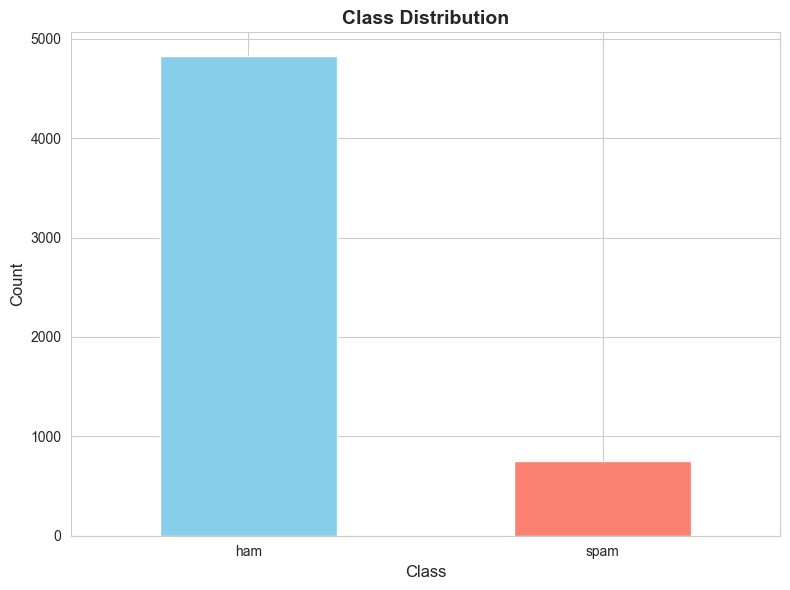

In [9]:
# Class distribution
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

**Encode Target Variable**

In [10]:
df['target_encoded'] = df['target'].map({'ham' :0, 'spam': 1})

print("Target encoding:")
print(df[['target', 'target_encoded']].head(10))

Target encoding:
  target  target_encoded
0    ham               0
1    ham               0
2   spam               1
3    ham               0
4    ham               0
5   spam               1
6    ham               0
7    ham               0
8   spam               1
9   spam               1


**Split Features and Target**

In [11]:
x = df.drop(columns=['target', 'target_encoded'], axis=1)
y = df['target_encoded']

print(f"Features shape: {x.shape}")
print(f"Target shape: {y.shape}")
print(f'Class distribution: {y.value_counts().to_dict()}')

Features shape: (5572, 1)
Target shape: (5572,)
Class distribution: {0: 4825, 1: 747}


**Train-Test Split**